<a href="https://colab.research.google.com/github/Sebastien-Trocherie/SJSU-EE104/blob/main/LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import SGD


In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [25]:
weight_decay = 1e-4

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [26]:
model.compile('adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5579 - accuracy: 0.4572 - val_loss: 1.4091 - val_accuracy: 0.5176
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1501 - accuracy: 0.6182 - val_loss: 1.4595 - val_accuracy: 0.5171
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0110 - accuracy: 0.6746 - val_loss: 0.9299 - val_accuracy: 0.7022
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9395 - accuracy: 0.7080 - val_loss: 0.8898 - val_accuracy: 0.7238
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8978 - accuracy: 0.7311 - val_loss: 0.8903 - val_accuracy: 0.7325
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8693 - accuracy: 0.7426 - val_loss: 0.7826 - val_accuracy: 0.7805
Epoch 7/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8461 - accuracy: 0.7581 - val_loss: 0.8399 - val_ac

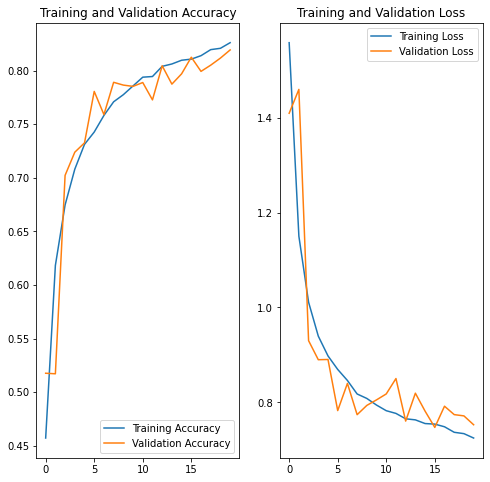

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.7527 - accuracy: 0.8192 - 1s/epoch - 4ms/step
